# Rappi Challenge 🚀  
## Step 1: Data Loading and Exploratory Data Analysis (EDA)  

Welcome to my Rappi Challenge notebook! In this first step, I will:  

- Load the dataset 📂  
- Perform **Exploratory Data Analysis (EDA)** to understand the data 📊  
- Identify and handle missing or inconsistent data 🛠️  
- Analyze the distribution of key features 📈  
- Explore relationships between variables to gain initial insights 🔍  

The goal is to **understand the dataset and define a strategy** to predict whether an order will be taken by a courier. Let's get started!  

## Step 1.1: Understanding the Dataset 🧐  

Before diving into the analysis, it's important to understand the structure of our dataset. Below is a description of each column:  

| **Column Name**      | **Description** |
|----------------------|----------------|
| `order_id`          | Unique identifier for each order. |
| `store_id`          | Unique identifier of the store where the order was placed. |
| `to_user_distance`  | Distance (in km) between the store and the customer's location. |
| `to_user_elevation` | Difference in elevation (in meters) between the store and the customer's location (meters above sea level). |
| `total_earning`     | Amount (in currency) that the courier earns for delivering the order. |
| `created_at`        | Timestamp indicating when the order was created. |
| `taken`             | Binary indicator (1 = order was taken by a courier, 0 = order was not taken). |

Understanding these columns is crucial, as they will help us determine which factors influence whether an order is accepted by a courier.  

Next, we will clean and organize the data to ensure the **best data quality** before proceeding with our analysis. 🚀  


In [1]:
#import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
orders = pd.read_csv('Orders (2025 Case).csv')

In [3]:
orders.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14364873,30000009,2.478101,-72.719360,4200.0,2017-09-07T20:02:17Z,0
1,14370123,30000058,0.451711,37.754761,4200.0,2017-09-07T20:13:16Z,0
2,14368534,900003684,2.026072,207.191162,4000.0,2017-09-07T20:07:23Z,0
3,14369923,900014085,0.965496,117.429199,3450.0,2017-09-07T20:12:14Z,1
4,14367859,900004363,0.577156,-7.895874,5200.0,2017-09-07T20:13:16Z,1


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125549 entries, 0 to 125548
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           125549 non-null  int64  
 1   store_id           125549 non-null  int64  
 2   to_user_distance   125549 non-null  float64
 3   to_user_elevation  125549 non-null  float64
 4   total_earning      125549 non-null  float64
 5   created_at         125549 non-null  object 
 6   taken              125549 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 6.7+ MB


## Step 2: Data Quality Check ✅  

After an initial inspection of the dataset, we can confirm that **there are no missing values**.  
This means we can proceed directly to the exploratory analysis without the need for imputation or handling null values.  

Now, let's **clean and organize the data** to ensure the **best data quality**. This includes:  
- Removing duplicates (if any)  
- Formatting data types correctly  
- Standardizing values for better consistency  

Once the data is properly structured, we will move forward with exploratory analysis to uncover meaningful insights.  


In [5]:
#lets format the date column
from datetime import datetime
orders['created_at'] = pd.to_datetime(orders['created_at'], format='%Y-%m-%dT%H:%M:%SZ')

In [6]:
orders.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
count,1.255490e+05,1.255490e+05,125549.000000,125549.000000,125549.000000,125549,125549.000000
mean,1.507838e+07,7.485716e+08,1.476668,27.369828,5374.313360,2017-09-20 10:30:15.587109376,0.922827
min,1.421073e+07,3.000000e+07,0.000000,-260.333130,0.000000,2017-09-05 00:01:02,0.000000
25%,1.467255e+07,9.000043e+08,0.809372,-18.417603,4200.000000,2017-09-13 07:47:03,1.000000
50%,1.509367e+07,9.000077e+08,1.360573,11.781250,5200.000000,2017-09-20 19:20:55,1.000000
75%,1.547552e+07,9.000127e+08,2.003069,62.978638,6400.000000,2017-09-27 12:28:57,1.000000
max,1.590252e+07,9.000173e+08,9.360177,975.226074,108200.000000,2017-10-04 23:58:53,1.000000
std,4.752629e+05,3.298381e+08,0.846750,84.818191,1784.919817,NaN,0.266867


In [7]:
#check for duplicates
orders.duplicated().sum()

0

In [8]:
orders['taken'].value_counts()

taken
1    115860
0      9689
Name: count, dtype: int64

In [9]:
9689/len(orders) * 100

7.71730559383189

In [10]:
orders['created_at'].dt.to_period('M').nunique()

2

In [11]:
orders['Year-Month'] = orders['created_at'].dt.to_period('M')

In [12]:
orders.groupby(['Year-Month', 'taken']).agg({'order_id':'count', 'to_user_distance':'mean', 'to_user_elevation':'mean', 'total_earning':'mean'}).reset_index()

,Year-Month,taken,order_id,to_user_distance,to_user_elevation,total_earning
0,2017-09,0,8625,1.725999,23.764095,5024.615188
1,2017-09,1,101190,1.451024,27.648335,5380.689861
2,2017-10,0,1064,1.771326,22.927621,5572.885338
3,2017-10,1,14670,1.485593,27.890877,5521.527267


## Step 2.1: Data Formatting and Initial Insights 🛠️  

To ensure consistency and facilitate analysis, we **formatted the `created_at` column as a date**.  
Additionally, we conducted an initial data inspection and found that:  

- ✅ There are **no duplicate records** in the dataset.  
- 📆 We **separated the data by month** (September and October) to analyze trends over time.  
- 📊 We **calculated the mean of each column**, grouped by month and the `taken` status, to uncover early insights.  

### Next Steps 🚀  
Now, we will create **visualizations** to better understand the data distribution. This includes:  
- Identifying **potential outliers** and understanding their impact.  
- Exploring the relationships between key variables.  

By doing this, we can refine our dataset and manage any anomalies before proceeding with predictive modeling. 🔍  


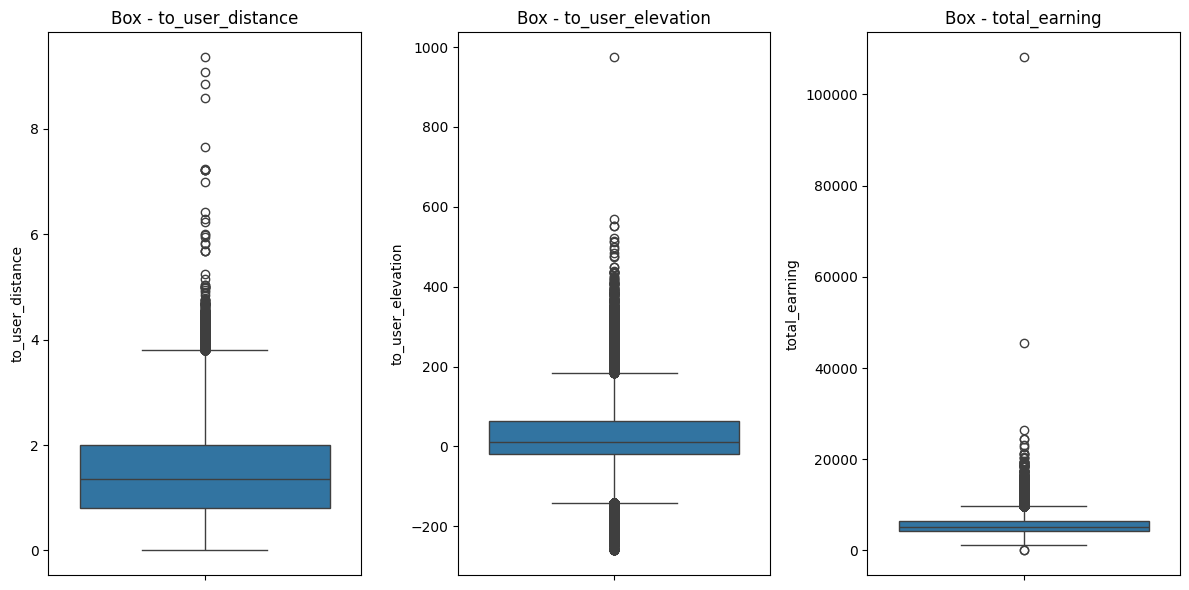

In [ ]:
#lets check the distribution of our data
numeric_columns = ['to_user_distance', 'to_user_elevation', 'total_earning']

plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  
    sns.boxplot(data=orders, y=column)
    plt.title(f'Box - {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

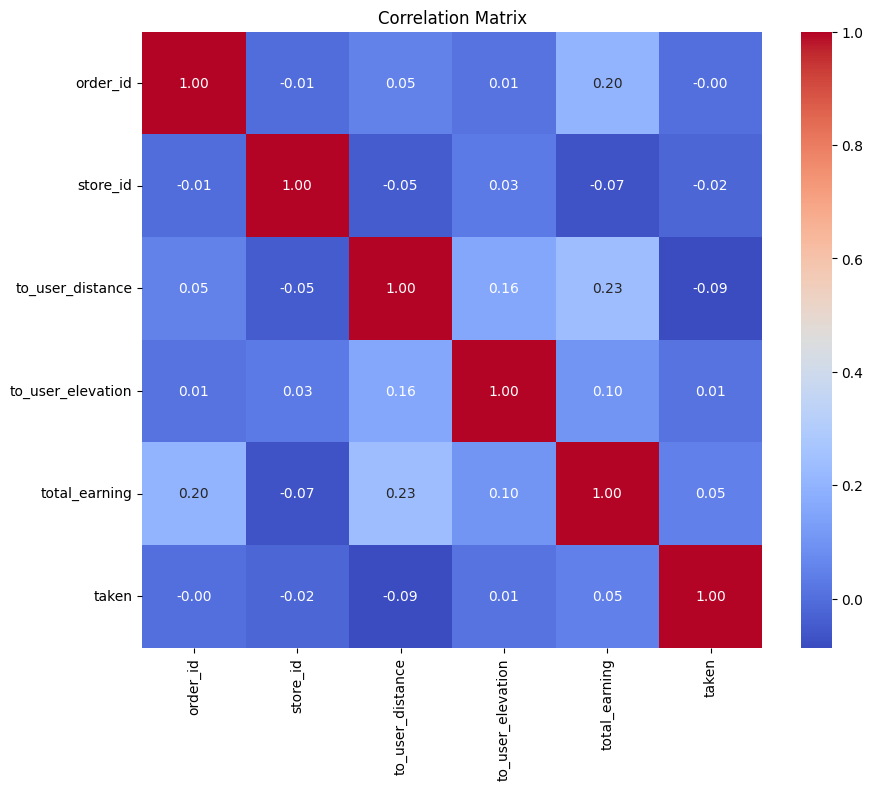

In [14]:
#now a correlation matrix
numeric_orders = orders.select_dtypes(include=['number'])
correlation_matrix = numeric_orders.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
orders[orders['total_earning']>40000]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month
7579,14421632,900013010,1.157337,-99.425781,45500.0,2017-09-08 17:32:07,1,2017-09
71730,14731230,900007197,1.794446,-207.245483,108200.0,2017-09-14 13:38:08,1,2017-09


In [16]:
orders[orders['to_user_elevation'] > 500]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month
5746,15701222,30000308,5.946226,975.226074,19500.0,2017-10-01 12:30:06,1,2017-10
32821,14949153,30000097,2.530015,552.779663,12200.0,2017-09-17 19:19:57,1,2017-09
33480,15527513,30000176,3.098737,512.598022,6900.0,2017-09-28 14:24:02,1,2017-09
34337,15701317,900002160,2.533773,552.779663,12600.0,2017-10-01 12:22:04,1,2017-10
34617,15464458,900006491,3.228127,521.867920,8050.0,2017-09-26 21:49:53,1,2017-09
54274,15884756,900014778,4.302365,514.591187,9550.0,2017-10-04 18:28:03,1,2017-10
84759,15727469,30000327,2.666894,569.255005,10050.0,2017-10-01 15:58:04,1,2017-10


In [17]:
orders[orders['to_user_elevation'] < -260]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month
61785,15494614,900007197,3.186888,-260.068115,5100.0,2017-09-27 18:40:08,1,2017-09
67730,15734062,900007197,3.186888,-260.068115,6400.0,2017-10-01 17:24:04,1,2017-10
84419,14777622,900016684,3.264740,-260.333130,6200.0,2017-09-15 12:50:10,1,2017-09
100055,15093141,900007197,3.345512,-260.141113,5250.0,2017-09-20 19:04:54,1,2017-09
123321,14786303,900007197,3.417081,-260.001221,5400.0,2017-09-15 14:41:08,1,2017-09


# **Data Analysis and Outlier Detection in Elevation and Distance**
In this section, we explore the relationships between distance traveled, terrain elevation, and earnings per kilometer. Our goal is to assess the logical consistency of the data and detect potential outliers.

## **1. Understanding Elevation and Distance Relationships**
To validate the correctness of our data, we introduce a new column that calculates the **slope (elevation change per kilometer)**. This metric helps us determine whether the elevation differences recorded for certain distances are realistic.

## **2. Outlier Detection in Elevation Data**
By plotting the slope distribution, we observe that most values fall within a reasonable range, but some extreme cases exceed **±200 meters per kilometer**. These extreme values could be due to:
- **Data entry errors**
- **Unrealistic elevation changes in short distances**
- **GPS inaccuracies or incorrect mappings**

### **2.1 Applying Logical Filters**
To ensure data consistency, we filter out values where:
- The slope is less than **-200 m/km** (extreme descents)
- The slope is greater than **200 m/km** (extreme ascents)

In [18]:
orders['slope'] = orders['to_user_elevation'] / orders['to_user_distance']

min_slope = -200  
max_slope = 200  

orders_clean = orders[(orders['slope'] >= min_slope) & (orders['slope'] <= max_slope)]


In [19]:
orders.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope
0,14364873,30000009,2.478101,-72.719360,4200.0,2017-09-07 20:02:17,0,2017-09,-29.344797
1,14370123,30000058,0.451711,37.754761,4200.0,2017-09-07 20:13:16,0,2017-09,83.581746
2,14368534,900003684,2.026072,207.191162,4000.0,2017-09-07 20:07:23,0,2017-09,102.262494
3,14369923,900014085,0.965496,117.429199,3450.0,2017-09-07 20:12:14,1,2017-09,121.625770
4,14367859,900004363,0.577156,-7.895874,5200.0,2017-09-07 20:13:16,1,2017-09,-13.680669


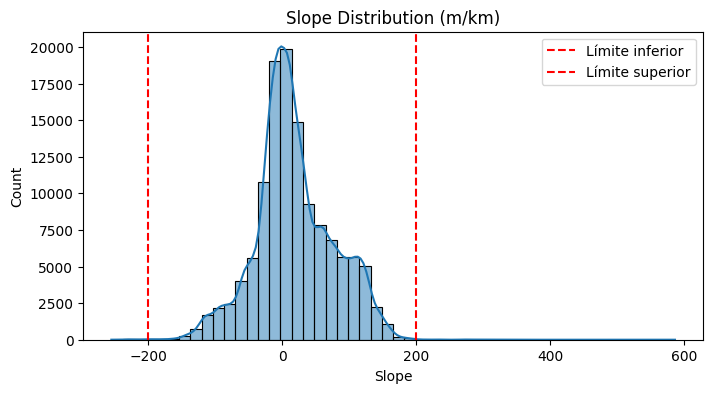

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(orders['slope'], bins=50, kde=True)
plt.axvline(min_slope, color='red', linestyle='dashed', label='Límite inferior')
plt.axvline(max_slope, color='red', linestyle='dashed', label='Límite superior')
plt.title("Slope Distribution (m/km)")
plt.xlabel("Slope")
plt.legend()
plt.show()

In [21]:
# amount of orders that have the slope out of the range
len(orders[(orders['slope'] < -200) | (orders['slope'] > 200)])

99

In [22]:
# percentage of orders that have the slope out of the range
round(len(orders[(orders['slope'] < -200) | (orders['slope'] > 200)]) / len(orders) * 100, 2)

0.08

In [23]:
orders[(orders['slope'] < -200) | (orders['slope'] > 200)].head(10)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope
722,14740069,30000286,0.247325,-56.152710,3200.0,2017-09-14 17:18:06,0,2017-09,-227.040031
3006,15701566,30000117,0.219706,78.048462,10150.0,2017-10-01 12:19:02,1,2017-10,355.240249
4826,14750248,30000254,0.104004,-21.967651,5500.0,2017-09-14 19:37:10,1,2017-09,-211.219243
4896,15200498,30000254,0.219201,-50.210815,8200.0,2017-09-22 19:30:07,1,2017-09,-229.063159
6279,15725131,30000286,0.247325,-56.152710,4500.0,2017-10-01 15:40:04,1,2017-10,-227.040031
6503,14431840,900012734,2.156518,494.066772,6900.0,2017-09-08 19:22:11,1,2017-09,229.103941
11554,15203660,30000286,0.388790,111.815918,10050.0,2017-09-22 20:22:12,1,2017-09,287.599990
11844,15888375,30000286,0.408185,110.714355,4700.0,2017-10-04 19:41:07,1,2017-10,271.235641
14536,14846570,30000286,0.408185,110.714355,4000.0,2017-09-16 14:13:50,1,2017-09,271.235641
15857,15570530,30000286,0.332063,-73.364624,3200.0,2017-09-29 12:31:07,1,2017-09,-220.935691


In [24]:
orders.drop(orders[(orders['slope'] < -200) | (orders['slope'] > 200)].index, inplace=True)

In [25]:
orders.drop(orders[orders['to_user_elevation']>800].index, inplace=True)

In [26]:
orders.drop(orders[orders.isnull().any(axis=1)].index, inplace=True)

## 3. Real-World Validation  
To ensure our filtering criteria make sense, we compare with real-world cases in Colombia:  

### 3.1 Bogotá (North)  
In Bogotá, there are areas with steep roads, such as La Calera or the hills near Usaquén. **Short sections** may reach slopes above **150 m/km**, but values beyond **200 m/km** in urban settings are highly unlikely.  

### 3.2 Medellín  
Medellín has steep inclines in neighborhoods like Manrique or Comuna 13. While it is possible to find **brief sections** with slopes near **200 m/km**, it is extremely rare to sustain a **164 m/km** slope for nearly **6 km**.  

### 3.3 Example: Extreme Cases  
We found an entry where:  

- **Elevation change:** -56 meters  
- **Distance traveled:** 0.2 km  
- **Slope:** -280 m/km  

While there are steep roads in Colombia, this **exceeds realistic urban conditions**, suggesting a potential data issue.  

---  

## 4. Conclusion  
We remove these extreme values because:  

- They **do not align** with known urban inclines.  
- Continuous high slopes over long distances (e.g., **164 m/km for 6 km**) are **highly improbable**.  
- Keeping them could **distort** models and analyses.  

By filtering **only 0.08% of the data**, we maintain a **realistic** and **reliable dataset**.  


In [27]:
orders.drop(orders[orders['total_earning']<1000].index, inplace=True)

In [28]:
orders[orders['to_user_distance'] <= 1].describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,slope
count,4.231200e+04,4.231200e+04,42312.000000,42312.000000,42312.000000,42312,42312.000000,42312.000000
mean,1.506519e+07,7.608382e+08,0.615292,9.558892,5098.409907,2017-09-20 04:56:14.254419456,0.950912,15.139801
min,1.421081e+07,3.000000e+07,0.002456,-149.404053,2200.000000,2017-09-05 00:11:02,0.000000,-199.204943
25%,1.465133e+07,9.000043e+08,0.434961,-12.682556,4200.000000,2017-09-12 16:31:05,1.000000,-24.781659
50%,1.507193e+07,9.000077e+08,0.633286,4.774414,5000.000000,2017-09-20 12:50:52,1.000000,9.607702
75%,1.547124e+07,9.000126e+08,0.816448,31.692871,6000.000000,2017-09-27 11:22:53,1.000000,59.637616
max,1.590240e+07,9.000172e+08,0.999909,176.751343,24500.000000,2017-10-04 23:39:54,1.000000,198.802620
std,4.774383e+05,3.188890e+08,0.240567,41.762478,1578.242172,NaN,0.216054,63.208302


In [29]:
orders[(orders['total_earning'] > 6000) & (orders['to_user_distance'] <= 1)]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope
54,14668850,30000026,0.295965,-12.344971,6200.0,2017-09-12 21:52:03,1,2017-09,-41.710944
65,14670517,900013069,0.608274,5.911011,6200.0,2017-09-12 23:37:02,1,2017-09,9.717677
68,14671218,900015309,0.219865,-17.833252,6200.0,2017-09-13 02:40:02,1,2017-09,-81.110001
119,14822329,900011642,0.976983,-15.536499,6500.0,2017-09-15 23:08:45,1,2017-09,-15.902535
138,14824534,900012742,0.128705,-1.419312,7000.0,2017-09-16 01:15:44,0,2017-09,-11.027643
...,...,...,...,...,...,...,...,...,...
125368,14798733,900004354,0.679170,-98.486084,6500.0,2017-09-15 18:05:09,1,2017-09,-145.009482
125371,14797840,900004621,0.910951,30.808960,6500.0,2017-09-15 18:10:11,1,2017-09,33.820657
125377,14799739,900007718,0.122020,15.772217,7500.0,2017-09-15 18:17:09,1,2017-09,129.259052
125422,15272697,900012734,0.716704,-63.999512,6200.0,2017-09-23 19:46:11,1,2017-09,-89.296931


In [30]:
short_distance_orders = orders[orders['to_user_distance'] <= 1]

q75 = short_distance_orders['total_earning'].quantile(0.75)
q95 = short_distance_orders['total_earning'].quantile(0.95)
q99 = short_distance_orders['total_earning'].quantile(0.99)
max_value = short_distance_orders['total_earning'].max()
print(f"75% of orders have earnings up to: {q75}")
print(f"95% of orders have earnings up to: {q95}")
print(f"99% of orders have earnings up to: {q99}")
print(f"Maximum value found: {max_value}")

75% of orders have earnings up to: 6000.0
95% of orders have earnings up to: 8200.0
99% of orders have earnings up to: 9500.0
Maximum value found: 24500.0


In [31]:
orders[(orders['total_earning'] > 10000) & (orders['to_user_distance'] <= 1)].sort_values('total_earning', ascending=False)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope
64444,14573879,900013033,0.823672,77.590698,24500.0,2017-09-10 21:12:08,1,2017-09,94.200970
45660,14926396,900006874,0.629038,-8.132324,24500.0,2017-09-17 15:11:50,1,2017-09,-12.928183
83404,15449048,900012872,0.683580,5.787842,22700.0,2017-09-26 18:36:01,1,2017-09,8.466959
8389,15783871,900009068,0.748671,-44.294678,21200.0,2017-10-02 16:40:59,1,2017-10,-59.164371
70104,15836645,30000308,0.489482,61.348755,19200.0,2017-10-03 19:21:07,1,2017-10,125.334045
...,...,...,...,...,...,...,...,...,...
24391,15202655,900013075,0.166031,11.722046,10200.0,2017-09-22 20:00:03,1,2017-09,70.601649
11561,15207384,900009618,0.482446,43.671265,10200.0,2017-09-22 20:32:06,1,2017-09,90.520595
74779,15355324,30000007,0.456881,31.011597,10200.0,2017-09-25 08:09:49,1,2017-09,67.876718
77574,15296602,900013742,0.828510,-67.147095,10200.0,2017-09-24 10:56:52,1,2017-09,-81.045616


In [32]:
round(len(orders[(orders['total_earning'] > 10000) & (orders['to_user_distance'] <= 1)])/len(orders), 3)

0.003

In [33]:
orders.drop(orders[(orders['total_earning'] > 10000) & (orders['to_user_distance'] <= 1)].index, inplace=True)

In [34]:
orders['earnings_per_km'] = round(orders['total_earning'] / orders['to_user_distance'], 0)

orders['earnings_per_km'] = orders['earnings_per_km'].astype(int)

short_distance_threshold = 1  
max_earning_per_km = 10000  

outliers = orders[
    (orders['to_user_distance'] > short_distance_threshold) & 
    (orders['earnings_per_km'] > max_earning_per_km)
]

In [35]:
len(outliers)

89

In [36]:
100 * len(outliers) / len(orders)

0.07114706658246264

In [37]:
max(orders['earnings_per_km'])

1302794

In [38]:
orders[orders['earnings_per_km'] == 1302794]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km
50493,14639915,900016023,0.002456,0.0,3200.0,2017-09-12 12:34:08,0,2017-09,0.0,1302794


In [39]:
len(orders[(orders['earnings_per_km'] <= orders['total_earning']) | (orders['total_earning'] <= 10000) & (orders['to_user_distance'] <= 1)]) / len(orders)

1.0

In [40]:
len(orders[(orders['earnings_per_km'] <= orders['total_earning']) | (orders['total_earning'] <= 10000) & (orders['to_user_distance'] <= 1)]) / len(orders)

1.0

In [41]:
orders.drop(orders[orders['total_earning']> 40000].index, inplace=True)

In [42]:
pd.options.display.float_format = '{:,.0f}'.format
orders[orders['earnings_per_km'] <= orders['total_earning']].describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,slope,earnings_per_km
count,"83,133","83,133","83,133","83,133","83,133",83133,"83,133","83,133","83,133"
mean,"15,085,038","742,881,840",2,36,"5,513",2017-09-20 13:18:38.630495488,1,19,"3,158"
min,"14,210,727","30,000,003",1,-260,"1,200",2017-09-05 00:01:02,0,-141,795
25%,"14,682,008","900,004,326",1,-23,"4,200",2017-09-13 12:44:10,1,-13,"2,176"
50%,"15,104,873","900,007,722",2,20,"5,200",2017-09-20 21:52:48,1,11,"2,875"
75%,"15,477,193","900,012,786",2,95,"6,500",2017-09-27 12:47:56,1,52,"3,842"
max,"15,902,524","900,017,291",9,522,"26,500",2017-10-04 23:58:53,1,199,"23,302"
std,"474,025","334,644,103",1,98,"1,825",NaN,0,55,"1,354"


In [43]:
normal_orders = orders[orders['earnings_per_km'] <= orders['total_earning']]

qn75 = normal_orders['earnings_per_km'].quantile(0.75)
qn95 = normal_orders['earnings_per_km'].quantile(0.95)
qn99 = normal_orders['earnings_per_km'].quantile(0.99)
max_value_n = normal_orders['earnings_per_km'].max()

print(f"75% of orders have earnings up to: {qn75}")
print(f"95% of orders have earnings up to: {qn95}")
print(f"99% of orders have earnings up to: {qn99}")
print(f"Maximum value found: {max_value_n}")

75% of orders have earnings up to: 3842.0
95% of orders have earnings up to: 5745.399999999994
99% of orders have earnings up to: 7499.0
Maximum value found: 23302


In [44]:
orders[(orders['earnings_per_km'] > 8000) & (orders['earnings_per_km'] <= orders['total_earning'])].sort_values('total_earning', ascending=False)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km
35634,15308498,900007725,1,41,"26,500",2017-09-24 13:47:59,1,2017-09,36,23302
27229,15492210,900006491,2,113,"23,200",2017-09-27 18:00:58,1,2017-09,72,14896
21139,14396929,30000072,2,-55,"21,200",2017-09-08 13:00:11,1,2017-09,-22,8593
47132,15292089,30000253,1,1,"20,500",2017-09-24 07:59:48,1,2017-09,1,17181
101473,15837794,900014452,2,-35,"20,200",2017-10-03 19:01:08,1,2017-10,-20,11501
...,...,...,...,...,...,...,...,...,...,...
64281,15470950,900009494,1,-102,"8,200",2017-09-27 11:14:53,1,2017-09,-100,8087
80092,15470466,30000159,1,31,"8,200",2017-09-27 10:57:52,1,2017-09,31,8067
39884,14386194,30000253,1,117,"8,200",2017-09-08 08:42:02,1,2017-09,116,8075
71424,15203365,30000238,1,-57,"8,200",2017-09-22 20:10:04,1,2017-09,-56,8080


In [45]:
round(len(orders[(orders['earnings_per_km'] > 8000) & (orders['earnings_per_km'] <= orders['total_earning'])].sort_values('total_earning', ascending=False))/len(orders),3)

0.004

In [46]:
orders.drop(orders[(orders['earnings_per_km'] > 8000) & (orders['earnings_per_km'] <= orders['total_earning'])].index, inplace=True)

In [47]:
orders.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km
0,14364873,30000009,2,-73,"4,200",2017-09-07 20:02:17,0,2017-09,-29,1695
1,14370123,30000058,0,38,"4,200",2017-09-07 20:13:16,0,2017-09,84,9298
2,14368534,900003684,2,207,"4,000",2017-09-07 20:07:23,0,2017-09,102,1974
3,14369923,900014085,1,117,"3,450",2017-09-07 20:12:14,1,2017-09,122,3573
4,14367859,900004363,1,-8,"5,200",2017-09-07 20:13:16,1,2017-09,-14,9010


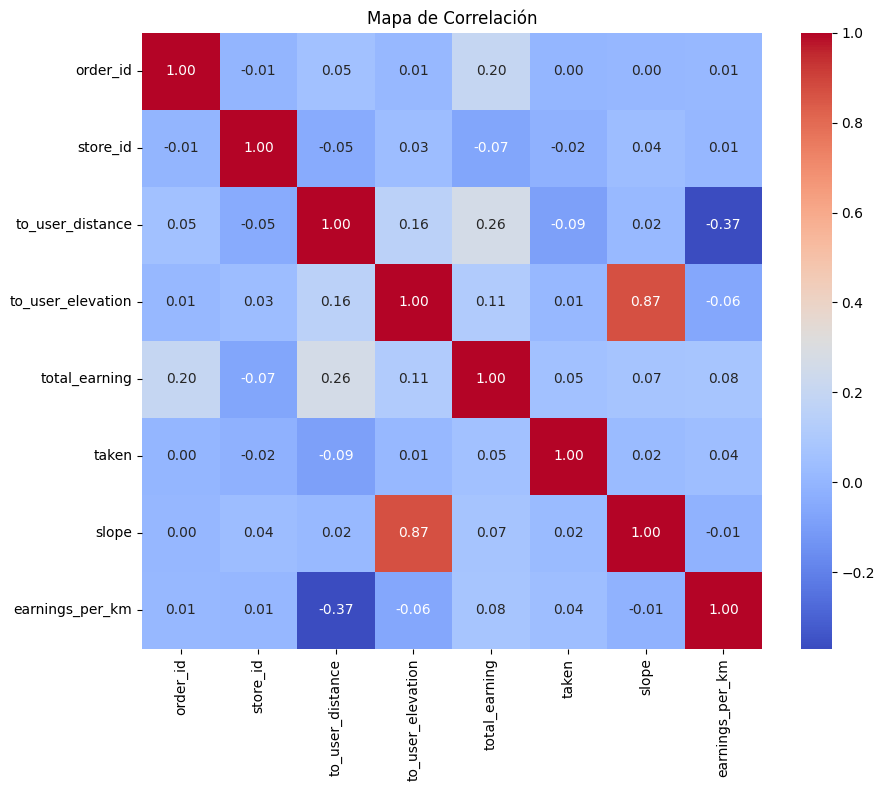

In [48]:
#now a correlation matrix
numeric_orders = orders.select_dtypes(include=['number'])
correlation_matrix = numeric_orders.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación')
plt.show()

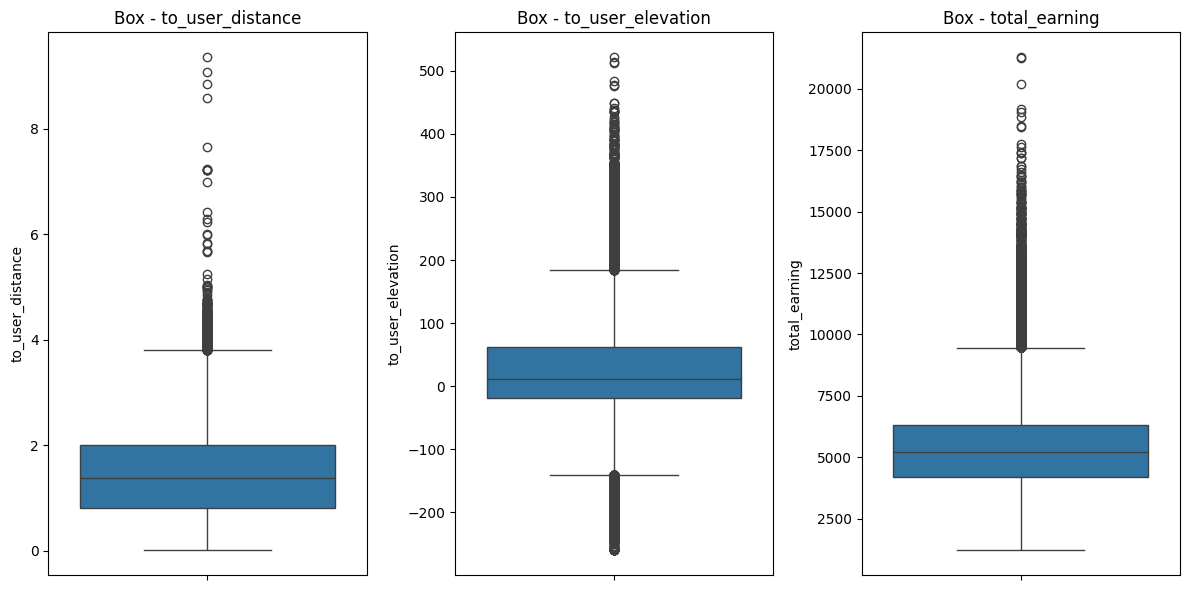

In [ ]:
#lets check the distribution of our data
numeric_columns = ['to_user_distance', 'to_user_elevation', 'total_earning']

plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  
    sns.boxplot(data=orders, y=column)
    plt.title(f'Box - {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [50]:
orders['taken'].value_counts()

taken
1    114938
0      9593
Name: count, dtype: int64

In [51]:
len(orders[orders['taken'] == 0])/len(orders)

0.07703302792075868

In [52]:
len(orders[orders['taken'] == 1])/len(orders)

0.9229669720792413

# **Data Analysis and Outlier Detection in Earnings**  
In this section, we analyze **earnings per kilometer (`earnings_per_km`)** and **total earnings for short-distance orders** to ensure logical consistency and detect potential outliers. Our goal is to refine the dataset by removing unrealistic values that could distort further analysis.  

## **1. Understanding Earnings for Short-Distance Orders**  
To identify potential issues with minimum fares, we examined orders where **the delivery distance was ≤ 1 km**. The percentile analysis revealed that:  
- **75% of orders** had total earnings up to **6,000 COP**.  
- **95% of orders** had total earnings up to **8,200 COP**.  
- **99% of orders** had total earnings up to **9,500 COP**.  
- The **maximum recorded value** was **24,500 COP**.  

### **1.1 Defining a Logical Threshold**  
Since **99% of the data** had earnings below **9,500 COP**, we set an upper limit of **10,000 COP** for rounding purposes. Orders exceeding this threshold were considered extreme and removed.  

### **1.2 Impact of Removing These Values**  
- The removed values represented **only a small fraction of the dataset**.  
- Their removal helped eliminate cases that could **skew the analysis of short-distance fares**.  
- This adjustment ensures that earnings data for short trips remain **consistent and representative** of real-world pricing.  

## **2. Detecting Unrealistic Values in Earnings per Kilometer**  
In addition to analyzing total earnings, we examined the `earnings_per_km` column to identify extreme values. The analysis showed that:  
- **75% of orders** had earnings per km up to **3,842 COP**.  
- **95% of orders** had earnings per km up to **5,745 COP**.  
- **99% of orders** had earnings per km up to **7,499 COP**.  
- The **maximum recorded value** was **23,302 COP per km**.  

### **2.1 Defining a Logical Threshold**  
Given that **99% of the dataset** had earnings per km below **7,499 COP**, we set an upper limit of **8,000 COP per km**. Orders exceeding this threshold were considered highly unusual and likely outliers.  

## **3. Filtering Out Extreme Values**  
To maintain data consistency, we removed:  
- Orders where **`total_earning` > 12,000 COP** for short distances (≤ 1 km).  
- Orders where **`earnings_per_km` > 8,000 COP**, as they were outside the logical range.  
- These values accounted for only **0.004% of the dataset**, making their removal negligible in terms of impact.  

## **4. Conclusion**  
By applying these filtering steps, we:  
- Ensured a **realistic dataset** by removing extreme short-distance earnings and high earnings per km.  
- Removed a **negligible percentage** of outliers while preserving valid data.  
- Established **clear thresholds** to maintain logical consistency in pricing data.  

With these refinements, the dataset is now **cleaner and more reliable** for further analysis and modeling. 🚀  


In [53]:
orders['hour'] = orders['created_at'].dt.strftime('%H:%M')

In [54]:
orders['weekday'] = orders['created_at'].dt.dayofweek

In [55]:
orders.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km,hour,weekday
0,14364873,30000009,2,-73,"4,200",2017-09-07 20:02:17,0,2017-09,-29,1695,20:02,3
1,14370123,30000058,0,38,"4,200",2017-09-07 20:13:16,0,2017-09,84,9298,20:13,3
2,14368534,900003684,2,207,"4,000",2017-09-07 20:07:23,0,2017-09,102,1974,20:07,3
3,14369923,900014085,1,117,"3,450",2017-09-07 20:12:14,1,2017-09,122,3573,20:12,3
4,14367859,900004363,1,-8,"5,200",2017-09-07 20:13:16,1,2017-09,-14,9010,20:13,3


In [56]:
orders.tail()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km,hour,weekday
125544,15650722,900005635,2,86,"6,350",2017-09-30 16:20:01,1,2017-09,57,4224,16:20,5
125545,15651534,900005727,2,290,"4,450",2017-09-30 16:26:01,1,2017-09,119,1822,16:26,5
125546,15651511,900010396,0,0,"5,200",2017-09-30 16:26:01,1,2017-09,1,55034,16:26,5
125547,15651572,30000322,2,184,"3,700",2017-09-30 16:27:00,1,2017-09,87,1746,16:27,5
125548,15652152,30000141,0,-2,"3,200",2017-09-30 16:27:00,1,2017-09,-9,14689,16:27,5


In [ ]:
total_orders = orders.groupby('weekday').agg({'order_id': 'count'}).rename(columns={'order_id': 'total_orders'})

not_taken_orders = orders[orders['taken'] == 0].groupby('weekday').agg({'order_id': 'count'}).rename(columns={'order_id': 'not_taken_orders'})

taken_orders = orders[orders['taken'] == 1].groupby('weekday').agg({'order_id': 'count'}).rename(columns={'order_id': 'taken_orders'})

df_orders = total_orders.merge(not_taken_orders, on='weekday', how='left').merge(taken_orders, on='weekday', how='left')

df_orders['taken_percentage'] = ((df_orders['taken_orders'] / df_orders['total_orders']) * 100).map(lambda x: f"{x:.1f}%")
df_orders['not_taken_percentage'] = ((df_orders['not_taken_orders'] / df_orders['total_orders']) * 100).map(lambda x: f"{x:.1f}%")

averages_taken = orders[orders['taken'] == 1].groupby('weekday').agg({
    'total_earning': 'mean',
    'to_user_distance': 'mean',
    'to_user_elevation': 'mean',
    'earnings_per_km': 'mean'
}).rename(columns={
    'total_earning': 'avg_earning_taken',
    'to_user_distance': 'avg_distance_taken',
    'to_user_elevation': 'avg_elevation_taken',
    'earnings_per_km': 'avg_earning_per_km_taken'
})

averages_not_taken = orders[orders['taken'] == 0].groupby('weekday').agg({
    'total_earning': 'mean',
    'to_user_distance': 'mean',
    'to_user_elevation': 'mean',
    'earnings_per_km': 'mean'
}).rename(columns={
    'total_earning': 'avg_earning_not_taken',
    'to_user_distance': 'avg_distance_not_taken',
    'to_user_elevation': 'avg_elevation_not_taken',
    'earnings_per_km': 'avg_earning_per_km_not_taken'
})
df_orders = df_orders.merge(averages_taken, on='weekday', how='left').merge(averages_not_taken, on='weekday', how='left')

weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df_orders['weekday_name'] = df_orders.index.map(weekday_mapping)

df_orders.set_index('weekday_name', inplace=True)

df_orders = df_orders[['total_orders', 'not_taken_orders', 'taken_orders', 'taken_percentage', 'not_taken_percentage',
                       'avg_earning_taken','avg_earning_not_taken', 'avg_earning_per_km_taken','avg_earning_per_km_not_taken', 'avg_distance_taken', 'avg_distance_not_taken', 'avg_elevation_taken',
                        'avg_elevation_not_taken']]

df_orders.head(7)

,total_orders,not_taken_orders,taken_orders,taken_percentage,not_taken_percentage,avg_earning_taken,avg_earning_not_taken,avg_earning_per_km_taken,avg_earning_per_km_not_taken,avg_distance_taken,avg_distance_not_taken,avg_elevation_taken,avg_elevation_not_taken
weekday_name,,,,,,,,,,,,,
Monday,12823,1108,11715,91.4%,8.6%,"5,349","4,911","6,152","4,244",1,2,21,18
Tuesday,17745,1310,16435,92.6%,7.4%,"5,793","5,145","6,466","5,140",1,2,25,18
Wednesday,16022,1090,14932,93.2%,6.8%,"4,700","4,515","5,484","3,680",1,2,20,26
Thursday,14060,1249,12811,91.1%,8.9%,"4,941","4,484","5,874","4,106",1,2,23,22
Friday,18093,1604,16489,91.1%,8.9%,"5,321","5,231","5,947","4,505",1,2,27,21
Saturday,20785,2061,18724,90.1%,9.9%,"4,880","4,808","5,475","4,258",1,2,32,29
Sunday,25003,1171,23832,95.3%,4.7%,"6,089","6,155","6,339","4,941",1,2,37,33


In [58]:
orders['hour'] = orders['created_at'].dt.hour

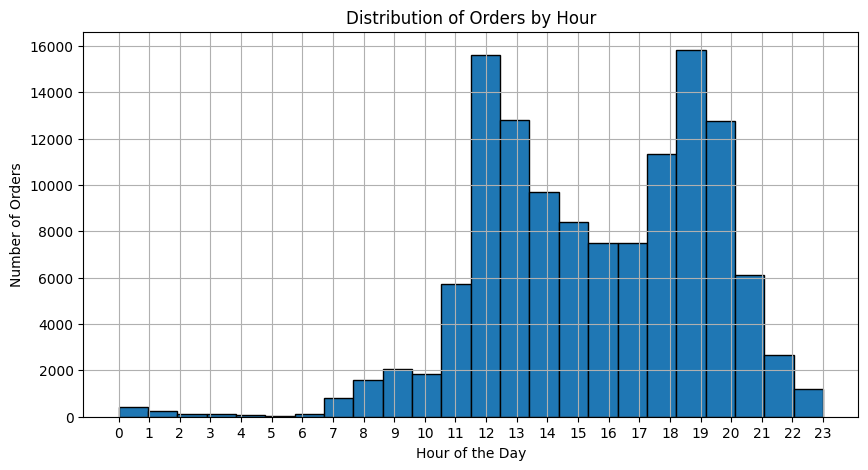

In [59]:
import matplotlib.pyplot as plt

orders['hour'] = pd.to_datetime(orders['created_at']).dt.hour

plt.figure(figsize=(10,5))
orders['hour'].hist(bins=24, edgecolor='black')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Distribution of Orders by Hour")
plt.xticks(range(0, 24))
plt.show()


In [60]:
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 1
    elif 6 <= hour < 10:
        return 2
    elif 10 <= hour < 14:
        return 3
    elif 14 <= hour < 18:
        return 4
    else:
        return 5

orders['hour_segment'] = orders['hour'].apply(categorize_hour)

orders['hour_segment'].value_counts()


hour_segment
5    49901
3    35984
4    33070
2     4571
1     1005
Name: count, dtype: int64

In [63]:
orders.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km,hour,weekday,hour_segment,hour_segment_label
0,14364873,30000009,2,-73,"4,200",2017-09-07 20:02:17,0,2017-09,-29,1695,20,3,5,Night (18:00-00:00)
1,14370123,30000058,0,38,"4,200",2017-09-07 20:13:16,0,2017-09,84,9298,20,3,5,Night (18:00-00:00)
2,14368534,900003684,2,207,"4,000",2017-09-07 20:07:23,0,2017-09,102,1974,20,3,5,Night (18:00-00:00)
3,14369923,900014085,1,117,"3,450",2017-09-07 20:12:14,1,2017-09,122,3573,20,3,5,Night (18:00-00:00)
4,14367859,900004363,1,-8,"5,200",2017-09-07 20:13:16,1,2017-09,-14,9010,20,3,5,Night (18:00-00:00)


In [71]:
hour_labels = {
    1: "Midnight (00:00-06:00)",
    2: "Morning (06:00-10:00)",
    3: "Midday (10:00-14:00)",
    4: "Afternoon (14:00-18:00)",
    5: "Night (18:00-00:00)"
}

orders['hour_segment_label'] = orders['hour_segment'].map(hour_labels)

total_orders_hour = orders.groupby('hour_segment_label').agg({'order_id': 'count'}).rename(columns={'order_id': 'total_orders'})

not_taken_orders_hour = orders[orders['taken'] == 0].groupby('hour_segment_label').agg({'order_id': 'count'}).rename(columns={'order_id': 'not_taken_orders'})

taken_orders_hour = orders[orders['taken'] == 1].groupby('hour_segment_label').agg({'order_id': 'count'}).rename(columns={'order_id': 'taken_orders'})

df_orders_hour = total_orders_hour.merge(not_taken_orders_hour, on='hour_segment_label', how='left').merge(taken_orders_hour, on='hour_segment_label', how='left')

df_orders_hour['taken_percentage'] = ((df_orders_hour['taken_orders'] / df_orders_hour['total_orders']) * 100).map(lambda x: f"{x:.1f}%")
df_orders_hour['not_taken_percentage'] = ((df_orders_hour['not_taken_orders'] / df_orders_hour['total_orders']) * 100).map(lambda x: f"{x:.1f}%")

averages_taken = orders[orders['taken'] == 1].groupby('hour_segment_label').agg({
    'total_earning': 'mean',
    'to_user_distance': 'mean',
    'to_user_elevation': 'mean',
    'earnings_per_km': 'mean'
}).rename(columns={
    'total_earning': 'avg_earning_taken',
    'to_user_distance': 'avg_distance_taken',
    'to_user_elevation': 'avg_elevation_taken',
    'earnings_per_km': 'avg_earning_per_km_taken'
})

averages_not_taken = orders[orders['taken'] == 0].groupby('hour_segment_label').agg({
    'total_earning': 'mean',
    'to_user_distance': 'mean',
    'to_user_elevation': 'mean',
    'earnings_per_km': 'mean'
}).rename(columns={
    'total_earning': 'avg_earning_not_taken',
    'to_user_distance': 'avg_distance_not_taken',
    'to_user_elevation': 'avg_elevation_not_taken',
    'earnings_per_km': 'avg_earning_per_km_not_taken'
})

df_orders_hour = df_orders_hour.merge(averages_taken, on='hour_segment_label', how='left').merge(averages_not_taken, on='hour_segment_label', how='left')

hour_order = ["Midnight (00:00-06:00)", "Morning (06:00-10:00)", "Midday (10:00-14:00)", "Afternoon (14:00-18:00)", "Night (18:00-00:00)"]

df_orders_hour = df_orders_hour[['total_orders', 'not_taken_orders', 'taken_orders', 'taken_percentage', 'not_taken_percentage',
                       'avg_earning_taken','avg_earning_not_taken', 'avg_earning_per_km_taken','avg_earning_per_km_not_taken', 'avg_distance_taken', 'avg_distance_not_taken', 'avg_elevation_taken',
                        'avg_elevation_not_taken']]

df_orders_hour = df_orders_hour.reindex(hour_order)

df_orders_hour.head()

,total_orders,not_taken_orders,taken_orders,taken_percentage,not_taken_percentage,avg_earning_taken,avg_earning_not_taken,avg_earning_per_km_taken,avg_earning_per_km_not_taken,avg_distance_taken,avg_distance_not_taken,avg_elevation_taken,avg_elevation_not_taken
hour_segment_label,,,,,,,,,,,,,
Midnight (00:00-06:00),1005,260,745,74.1%,25.9%,"6,203","6,774","6,414","6,598",2,2,39,32
Morning (06:00-10:00),4571,193,4378,95.8%,4.2%,"5,700","5,334","6,237","5,298",1,2,21,28
Midday (10:00-14:00),35984,2357,33627,93.4%,6.6%,"5,375","5,018","5,945","4,811",1,2,23,17
Afternoon (14:00-18:00),33070,2262,30808,93.2%,6.8%,"5,135","4,859","5,914","4,146",1,2,28,23
Night (18:00-00:00),49901,4521,45380,90.9%,9.1%,"5,444","4,999","6,014","4,182",1,2,31,28


In [ ]:
orders['to_user_distance_int'] = orders['to_user_distance'].astype(int)

total_orders_distance = orders.groupby('to_user_distance_int').agg({'order_id': 'count'}).rename(columns={'order_id': 'total_orders'})

not_taken_orders_distance = orders[orders['taken'] == 0].groupby('to_user_distance_int').agg({'order_id': 'count'}).rename(columns={'order_id': 'not_taken_orders'})

taken_orders_distance = orders[orders['taken'] == 1].groupby('to_user_distance_int').agg({'order_id': 'count'}).rename(columns={'order_id': 'taken_orders'})

df_orders_distance = total_orders_distance.merge(not_taken_orders_distance, on='to_user_distance_int', how='left').merge(taken_orders_distance, on='to_user_distance_int', how='left')

df_orders_distance['taken_percentage'] = ((df_orders_distance['taken_orders'] / df_orders_distance['total_orders']) * 100).map(lambda x: f"{x:.1f}%")
df_orders_distance['not_taken_percentage'] = ((df_orders_distance['not_taken_orders'] / df_orders_distance['total_orders']) * 100).map(lambda x: f"{x:.1f}%")

averages_taken = orders[orders['taken'] == 1].groupby('to_user_distance_int').agg({
    'total_earning': 'mean',
    'to_user_elevation': 'mean',
    'earnings_per_km': 'median'
}).rename(columns={
    'total_earning': 'avg_earning_taken',
    'to_user_elevation': 'avg_elevation_taken',
    'earnings_per_km': 'avg_earning_per_km_taken'
})

averages_not_taken = orders[orders['taken'] == 0].groupby('to_user_distance_int').agg({
    'total_earning': 'mean',
    'to_user_elevation': 'mean',
    'earnings_per_km': 'median'
}).rename(columns={
    'total_earning': 'avg_earning_not_taken',
    'to_user_elevation': 'avg_elevation_not_taken',
    'earnings_per_km': 'avg_earning_per_km_not_taken'
})

df_orders_distance = df_orders_distance.merge(averages_taken, on='to_user_distance_int', how='left').merge(averages_not_taken, on='to_user_distance_int', how='left')

df_orders_distance = df_orders_distance[['total_orders', 'not_taken_orders', 'taken_orders', 'taken_percentage', 'not_taken_percentage',
                       'avg_earning_taken','avg_earning_not_taken', 'avg_earning_per_km_taken','avg_earning_per_km_not_taken', 'avg_elevation_taken',
                        'avg_elevation_not_taken']]
df_orders_distance.head(10)

,total_orders,not_taken_orders,taken_orders,taken_percentage,not_taken_percentage,avg_earning_taken,avg_earning_not_taken,avg_earning_per_km_taken,avg_earning_per_km_not_taken,avg_elevation_taken,avg_elevation_not_taken
to_user_distance_int,,,,,,,,,,,
0,41959,"2,035",39924,95.2%,4.8%,"5,063","4,650","8,074","6,850",10,9
1,51026,"4,135",46891,91.9%,8.1%,"5,210","4,757","3,440","2,976",31,19
2,24087,"2,590",21497,89.2%,10.8%,"5,710","5,277","2,273","2,054",51,43
3,6864,795,6069,88.4%,11.6%,"6,891","6,445","1,957","1,793",37,28
4,569,38,531,93.3%,6.7%,"8,035","7,586","1,792","1,700",-1,-3
5,11,0,11,100.0%,0.0%,"10,864",NaN,"2,055",NaN,4,NaN
6,5,0,5,100.0%,0.0%,"10,760",NaN,"1,844",NaN,-17,NaN
7,6,0,6,100.0%,0.0%,"12,425",NaN,"1,750",NaN,68,NaN
8,2,0,2,100.0%,0.0%,"15,850",NaN,"1,819",NaN,50,NaN


In [ ]:
total_orders_store = orders.groupby('store_id').agg({'order_id': 'count'}).rename(columns={'order_id': 'total_orders'})

not_taken_orders_store = orders[orders['taken'] == 0].groupby('store_id').agg({'order_id': 'count'}).rename(columns={'order_id': 'not_taken_orders'})

taken_orders_store = orders[orders['taken'] == 1].groupby('store_id').agg({'order_id': 'count'}).rename(columns={'order_id': 'taken_orders'})

df_orders_store = total_orders_store.merge(not_taken_orders_store, on='store_id', how='left').merge(taken_orders_store, on='store_id', how='left')


df_orders_store['taken_percentage'] = (df_orders_store['taken_orders'] / df_orders_store['total_orders'] * 100).map(lambda x: f"{x:.1f}%")
df_orders_store['not_taken_percentage'] = (df_orders_store['not_taken_orders'] / df_orders_store['total_orders'] * 100).map(lambda x: f"{x:.1f}%")

averages_taken_store = orders[orders['taken'] == 1].groupby('store_id').agg({
    'total_earning': 'mean',
    'to_user_distance': 'mean',
    'to_user_elevation': 'mean'
}).rename(columns={
    'total_earning': 'avg_earning_taken',
    'to_user_distance': 'avg_distance_taken',
    'to_user_elevation': 'avg_elevation_taken'
})

averages_not_taken_store = orders[orders['taken'] == 0].groupby('store_id').agg({
    'total_earning': 'mean',
    'to_user_distance': 'mean',
    'to_user_elevation': 'mean'
}).rename(columns={
    'total_earning': 'avg_earning_not_taken',
    'to_user_distance': 'avg_distance_not_taken',
    'to_user_elevation': 'avg_elevation_not_taken'
})

df_orders_store = df_orders_store.merge(averages_taken_store, on='store_id', how='left').merge(averages_not_taken_store, on='store_id', how='left')


In [96]:
q99restaurant = df_orders_store['total_orders'].quantile(0.99)
q99restaurant

1576.6599999999949

In [100]:
print("Top 10 Stores with the Most Orders")
most_taken_stores = df_orders_store.sort_values(by='total_orders', ascending=False).head(10) 
most_taken_stores.head(10)

Top 10 Stores with the Most Orders


,total_orders,not_taken_orders,taken_orders,taken_percentage,not_taken_percentage,avg_earning_taken,avg_distance_taken,avg_elevation_taken,avg_earning_not_taken,avg_distance_not_taken,avg_elevation_not_taken,taken_percentage_num,not_taken_percentage_num
store_id,,,,,,,,,,,,,
30000308,2812,236,"2,576",91.6%,8.4%,"5,856",2,62,"5,256",2,45,92,8
900005727,2708,232,"2,476",91.4%,8.6%,"4,957",1,73,"4,536",2,59,91,9
900009494,2133,224,"1,909",89.5%,10.5%,"5,743",2,-18,"5,683",2,-29,89,11
900003684,2003,97,"1,906",95.2%,4.8%,"5,578",1,84,"4,625",1,78,95,5
30000020,2003,52,"1,951",97.4%,2.6%,"6,012",2,-29,"5,382",2,-55,97,3
900014452,1932,152,"1,780",92.1%,7.9%,"5,691",2,91,"5,392",2,66,92,8
900015225,1887,397,"1,490",79.0%,21.0%,"5,793",2,58,"5,198",2,55,79,21
900006038,1729,122,"1,607",92.9%,7.1%,"5,465",1,50,"5,499",2,46,93,7
900008201,1582,92,"1,490",94.2%,5.8%,"4,852",2,56,"4,796",2,57,94,6


In [84]:
print("Top 10 Stores with the Most Taken Orders")
most_taken_stores = df_orders_store.sort_values(by='taken_orders', ascending=False).head(10) 
most_taken_stores.head(10)

Top 10 Stores with the Most Taken Orders


,total_orders,not_taken_orders,taken_orders,taken_percentage,not_taken_percentage,avg_earning_taken,avg_distance_taken,avg_elevation_taken,avg_earning_not_taken,avg_distance_not_taken,avg_elevation_not_taken
store_id,,,,,,,,,,,
30000308,2812,236,"2,576",91.6%,8.4%,"5,856",2,62,"5,256",2,45
900005727,2708,232,"2,476",91.4%,8.6%,"4,957",1,73,"4,536",2,59
30000020,2003,52,"1,951",97.4%,2.6%,"6,012",2,-29,"5,382",2,-55
900009494,2133,224,"1,909",89.5%,10.5%,"5,743",2,-18,"5,683",2,-29
900003684,2003,97,"1,906",95.2%,4.8%,"5,578",1,84,"4,625",1,78
900014452,1932,152,"1,780",92.1%,7.9%,"5,691",2,91,"5,392",2,66
900006038,1729,122,"1,607",92.9%,7.1%,"5,465",1,50,"5,499",2,46
900008201,1582,92,"1,490",94.2%,5.8%,"4,852",2,56,"4,796",2,57
900015225,1887,397,"1,490",79.0%,21.0%,"5,793",2,58,"5,198",2,55


In [ ]:
df_orders_store['taken_percentage_num'] = (df_orders_store['taken_orders'] / df_orders_store['total_orders']) * 100
df_orders_store['not_taken_percentage_num'] = (df_orders_store['not_taken_orders'] / df_orders_store['total_orders']) * 100

df_orders_store['taken_percentage'] = df_orders_store['taken_percentage_num'].map(lambda x: f"{x:.1f}%")
df_orders_store['not_taken_percentage'] = df_orders_store['not_taken_percentage_num'].map(lambda x: f"{x:.1f}%")

min_orders = 1576
filtered_df = df_orders_store[df_orders_store['total_orders'] >= min_orders]

print("Top 10 Restaurants with the Most Not Taken Orders per Percentage (with Minimum Orders)")
most_not_taken_stores = filtered_df.sort_values(by='taken_percentage_num', ascending=False).head(10)
most_not_taken_stores.head(10)

Top 10 Restaurants with the Most Not Taken Orders per Percentage (with Minimum Orders)


,total_orders,not_taken_orders,taken_orders,taken_percentage,not_taken_percentage,avg_earning_taken,avg_distance_taken,avg_elevation_taken,avg_earning_not_taken,avg_distance_not_taken,avg_elevation_not_taken,taken_percentage_num,not_taken_percentage_num
store_id,,,,,,,,,,,,,
30000020,2003,52,"1,951",97.4%,2.6%,"6,012",2,-29,"5,382",2,-55,97,3
900003684,2003,97,"1,906",95.2%,4.8%,"5,578",1,84,"4,625",1,78,95,5
900008201,1582,92,"1,490",94.2%,5.8%,"4,852",2,56,"4,796",2,57,94,6
900006038,1729,122,"1,607",92.9%,7.1%,"5,465",1,50,"5,499",2,46,93,7
900014452,1932,152,"1,780",92.1%,7.9%,"5,691",2,91,"5,392",2,66,92,8
30000308,2812,236,"2,576",91.6%,8.4%,"5,856",2,62,"5,256",2,45,92,8
900005727,2708,232,"2,476",91.4%,8.6%,"4,957",1,73,"4,536",2,59,91,9
900009494,2133,224,"1,909",89.5%,10.5%,"5,743",2,-18,"5,683",2,-29,89,11
900015225,1887,397,"1,490",79.0%,21.0%,"5,793",2,58,"5,198",2,55,79,21


In [88]:
print("Top 10 Restaurants with the Most Not Taken Orders")
most_not_taken_stores = df_orders_store.sort_values(by='not_taken_orders', ascending=False).head(10) 
most_not_taken_stores.head(10)

Top 10 Restaurants with the Most Not Taken Orders


,total_orders,not_taken_orders,taken_orders,taken_percentage,not_taken_percentage,avg_earning_taken,avg_distance_taken,avg_elevation_taken,avg_earning_not_taken,avg_distance_not_taken,avg_elevation_not_taken
store_id,,,,,,,,,,,
900015225,1887,397,"1,490",79.0%,21.0%,"5,793",2,58,"5,198",2,55
30000308,2812,236,"2,576",91.6%,8.4%,"5,856",2,62,"5,256",2,45
900005727,2708,232,"2,476",91.4%,8.6%,"4,957",1,73,"4,536",2,59
900009494,2133,224,"1,909",89.5%,10.5%,"5,743",2,-18,"5,683",2,-29
900002516,1493,186,"1,307",87.5%,12.5%,"5,459",1,81,"4,895",2,94
900014724,666,169,497,74.6%,25.4%,"5,747",2,33,"4,760",2,31
900005637,981,166,815,83.1%,16.9%,"5,563",1,-68,"5,251",1,-90
900014452,1932,152,"1,780",92.1%,7.9%,"5,691",2,91,"5,392",2,66
900006038,1729,122,"1,607",92.9%,7.1%,"5,465",1,50,"5,499",2,46


In [ ]:
df_orders_store['taken_percentage_num'] = (df_orders_store['taken_orders'] / df_orders_store['total_orders']) * 100
df_orders_store['not_taken_percentage_num'] = (df_orders_store['not_taken_orders'] / df_orders_store['total_orders']) * 100

df_orders_store['taken_percentage'] = df_orders_store['taken_percentage_num'].map(lambda x: f"{x:.1f}%")
df_orders_store['not_taken_percentage'] = df_orders_store['not_taken_percentage_num'].map(lambda x: f"{x:.1f}%")

min_orders = 1576
filtered_df = df_orders_store[df_orders_store['total_orders'] >= min_orders]

print("Top 10 Restaurants with the Most Not Taken Orders per Percentage (with Minimum Orders)")
most_not_taken_stores = filtered_df.sort_values(by='not_taken_percentage_num', ascending=False).head(10)
most_not_taken_stores.head(10)

Top 10 Restaurants with the Most Not Taken Orders per Percentage (with Minimum Orders)


,total_orders,not_taken_orders,taken_orders,taken_percentage,not_taken_percentage,avg_earning_taken,avg_distance_taken,avg_elevation_taken,avg_earning_not_taken,avg_distance_not_taken,avg_elevation_not_taken,taken_percentage_num,not_taken_percentage_num
store_id,,,,,,,,,,,,,
900015225,1887,397,"1,490",79.0%,21.0%,"5,793",2,58,"5,198",2,55,79,21
900009494,2133,224,"1,909",89.5%,10.5%,"5,743",2,-18,"5,683",2,-29,89,11
900005727,2708,232,"2,476",91.4%,8.6%,"4,957",1,73,"4,536",2,59,91,9
30000308,2812,236,"2,576",91.6%,8.4%,"5,856",2,62,"5,256",2,45,92,8
900014452,1932,152,"1,780",92.1%,7.9%,"5,691",2,91,"5,392",2,66,92,8
900006038,1729,122,"1,607",92.9%,7.1%,"5,465",1,50,"5,499",2,46,93,7
900008201,1582,92,"1,490",94.2%,5.8%,"4,852",2,56,"4,796",2,57,94,6
900003684,2003,97,"1,906",95.2%,4.8%,"5,578",1,84,"4,625",1,78,95,5
30000020,2003,52,"1,951",97.4%,2.6%,"6,012",2,-29,"5,382",2,-55,97,3


## 📌 Feature Engineering: Extracting Time Components and Order Analysis

### 🕒 Extracting Time Features
In this step, we extracted key time-related features from the order timestamp:  
- **Hour and Minute** from the order timestamp.
- **Day of the Week** to analyze order distribution across different days.

### 📊 Initial Order Analysis
We analyzed the distribution of orders by day and calculated the **percentage of orders taken vs. not taken**.  
This helps us understand which days experience higher demand and how frequently orders are successfully processed.

### 📈 Hourly Order Segmentation
To better capture demand patterns, we segmented hours into time slots based on the histogram of order distribution:

| **Time Segment**   | **Hour Range**  | **Description** |
|--------------------|----------------|----------------|
| **Midnight**      | 00:00 - 06:00  | Low-demand period |
| **Morning**       | 06:00 - 10:00  | Morning order rush |
| **Midday Peak**   | 10:00 - 14:00  | High-demand period |
| **Afternoon Dip** | 14:00 - 18:00  | Decreased demand |
| **Evening Peak**  | 18:00 - 23:59  | High-demand period |

This segmentation was derived from the histogram analysis of orders per hour, allowing us to group hours logically based on demand trends.

### 📌 Order Analysis by Time Segments
We further analyzed the **percentage of orders taken vs. not taken** in each of the defined time segments.  
This helps in understanding when the demand is highest and how efficiently orders are being fulfilled.

In [ ]:
df_taken = orders[orders['taken'] == 1].copy()

df_taken['to_user_distance'] = df_taken['to_user_distance'].round().astype(int)  
df_taken['to_user_elevation'] = (df_taken['to_user_elevation'] // 10) * 10 + 10  
df_taken['total_earning'] = (df_taken['total_earning'] // 1000) * 1000 + 1000  

duplicated_indices = df_taken[df_taken.duplicated(
    subset=['to_user_distance', 'to_user_elevation', 'total_earning', 'weekday', 'hour_segment'],
    keep='first'
)].index

orders_cleaned = orders.drop(index=duplicated_indices)


In [ ]:
len(duplicated_indices)

93753

In [ ]:
len(orders_cleaned)

30778

In [ ]:
100 - (len(orders_cleaned) / len(orders) * 100)

75.28486882784206

In [ ]:
orders_cleaned['taken'].value_counts()

taken
1    21185
0     9593
Name: count, dtype: int64

In [ ]:
len(orders_cleaned[orders_cleaned['taken'] == 1]) / len(orders_cleaned)

0.6883163298459939

In [ ]:
len(orders_cleaned[orders_cleaned['taken'] == 0]) / len(orders_cleaned)

0.3116836701540061

## 📌 Data Balancing Process

### **1. Filtering and Copying Taken Requests**
Since the dataset was unbalanced, we decided to work only with the requests that were successfully taken. We created a copy of this subset to ensure that the original data remains unchanged.

### **2. Rounding Key Variables**
To make the data more structured and reduce unnecessary variations, we applied the following transformations:

- **`to_user_distance`**: Rounded to the nearest integer.
- **`to_user_elevation`**: Rounded to the nearest multiple of 10.
- **`total_earnings`**: Rounded to the nearest multiple of 1000.

### **3. Identifying Duplicates**
After rounding, we looked for duplicate records based on:
- `to_user_distance`
- `to_user_elevation`
- `total_earnings`
- `weekday`
- `hour_segment_label`

The goal was to identify and remove redundant records that do not add significant new information.

### **4. Reduction Analysis**
Initially, we had **114,938** records. After removing duplicates, the count dropped to **21,185**, which represents a **reduction of 75.28%**. This reduction was necessary to balance the dataset, as the proportion of **not taken orders** was less than **1%**.

### **5. Achieving a More Balanced Dataset**
By applying this structured deduplication process, we now have a more balanced dataset. The final taken-to-not-taken ratio is approximately **70/30**, which is a suitable distribution for model development.

This ensures that the model is trained on a dataset with reduced noise while maintaining the key patterns required for predictive analysis.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier, plot_importance

df = orders_cleaned.copy()

features = ['to_user_distance', 'to_user_elevation', 'total_earning', 'earnings_per_km', 'weekday', 'hour_segment']

X = df[features]
y = df["taken"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# calculate the scale_pos_weight value
n_0 = (y_train == 0).sum()  
n_1 = (y_train == 1).sum()  
scale_pos_weight = n_0 / n_1

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric="aucpr",
    use_label_encoder=False,
    max_depth=6,
    min_child_weight=2,
    gamma=0.2,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

# ajust the threshold for get results based on no taken orders
threshold = 0.55
y_pred = (y_pred_prob > threshold).astype(int)

c:\Users\Andrés Dardex\Documents\rappi project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [04:43:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Clasification report ===
              precision    recall  f1-score   support

           0       0.55      0.75      0.63      2878
           1       0.86      0.72      0.79      6356

    accuracy                           0.73      9234
   macro avg       0.71      0.74      0.71      9234
weighted avg       0.77      0.73      0.74      9234


=== AUC-ROC ===
0.8049991122077556


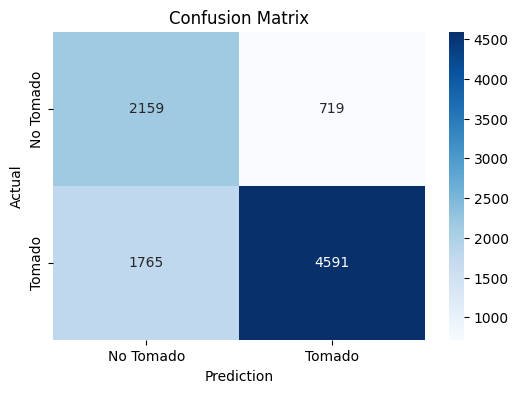

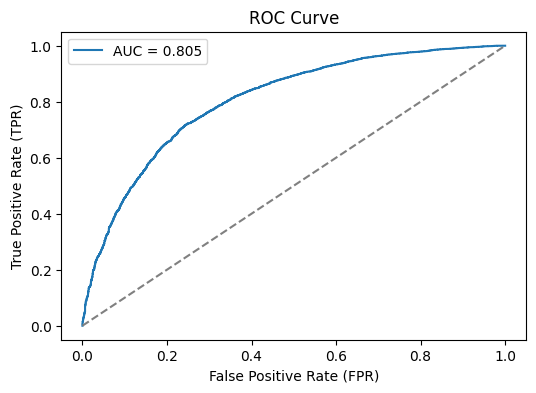

<Figure size 800x600 with 0 Axes>

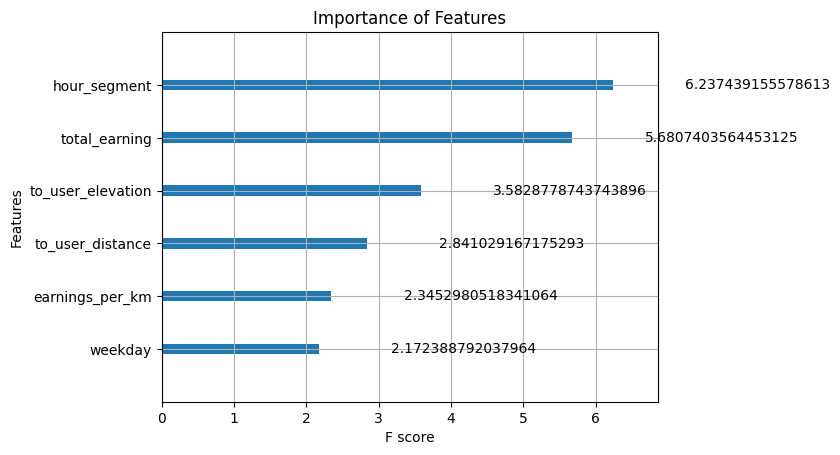

In [ ]:
print("\n=== Clasification report ===")
print(classification_report(y_test, y_pred))

print("\n=== AUC-ROC ===")
print(roc_auc_score(y_test, y_pred_prob))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Tomado", "Tomado"], yticklabels=["No Tomado", "Tomado"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plot_importance(model, importance_type="gain", max_num_features=10)  
plt.title("Importance of Features")
plt.show()


<Figure size 800x600 with 0 Axes>

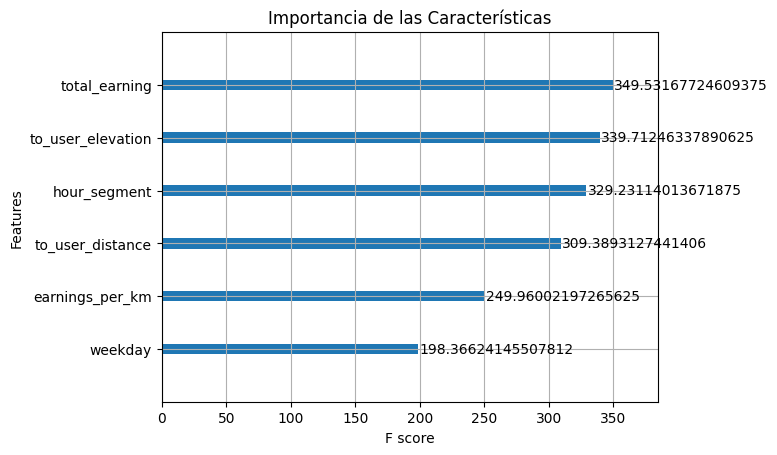

In [ ]:
plt.figure(figsize=(8, 6))
plot_importance(model, importance_type="cover", max_num_features=10)
plt.title("Importancia de las Características")
plt.show()


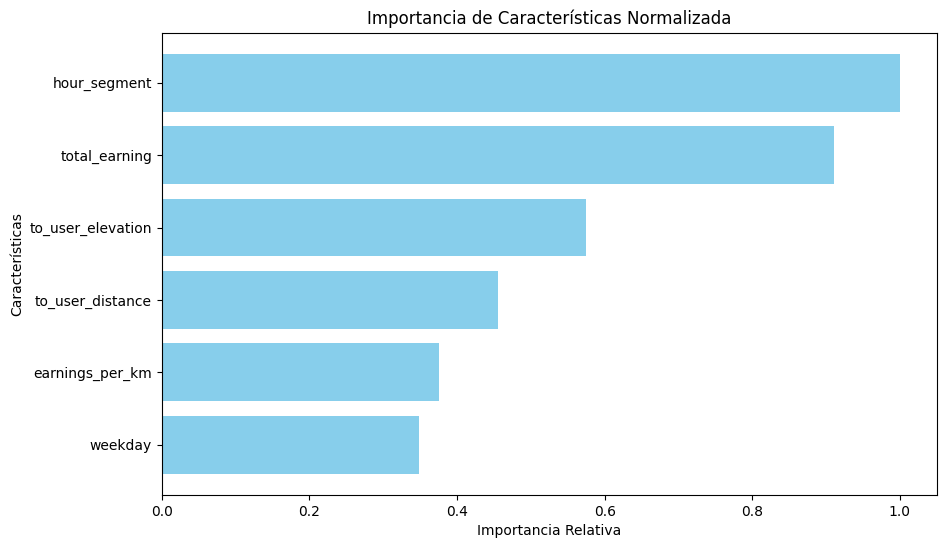

In [ ]:
importance_dict = model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

max_importance = importance_df['Importance'].max()
importance_df['Relative Importance'] = importance_df['Importance'] / max_importance

importance_df = importance_df.sort_values(by='Relative Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Relative Importance'], color='skyblue')
plt.xlabel('Importancia Relativa')
plt.ylabel('Características')
plt.title('Importancia de Características Normalizada')
plt.gca().invert_yaxis()
plt.show()

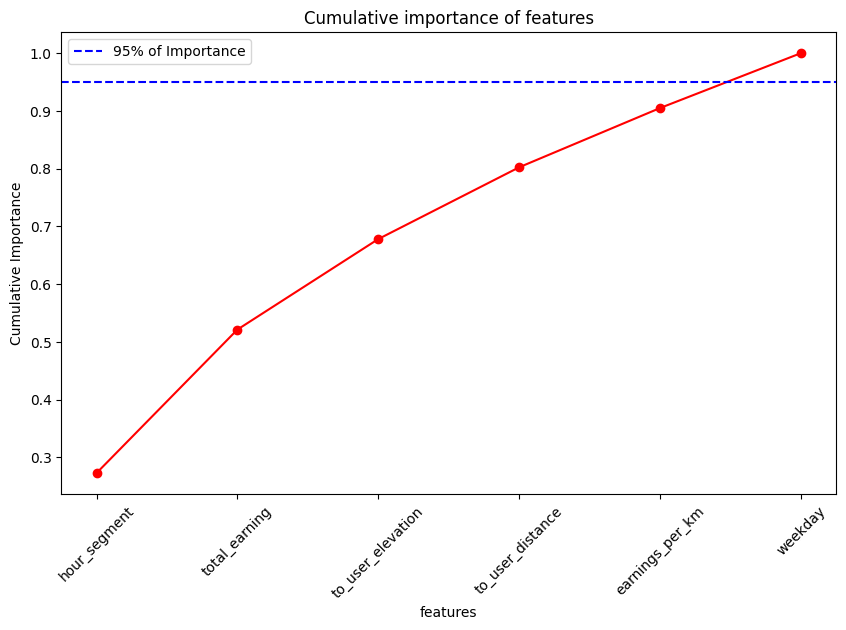

In [ ]:
importance_df['Relative Importance'] = importance_df['Importance'] / importance_df['Importance'].sum()

importance_df['Cumulative Importance'] = importance_df['Relative Importance'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(importance_df['Feature'], importance_df['Cumulative Importance'], marker='o', linestyle='-', color='red')
plt.axhline(y=0.95, color='blue', linestyle='--', label='95% of Importance')
plt.xticks(rotation=45)
plt.xlabel('features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative importance of features')
plt.legend()
plt.show()



In [ ]:
selected_features = importance_df[importance_df['Relative Importance'] > 0.10]['Feature'].tolist()
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

model_reduced = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                              eval_metric="aucpr", use_label_encoder=False)
model_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = model_reduced.predict(X_test_reduced)
print(classification_report(y_test, y_pred_reduced))


              precision    recall  f1-score   support

           0       0.56      0.68      0.62      2878
           1       0.84      0.76      0.80      6356

    accuracy                           0.74      9234
   macro avg       0.70      0.72      0.71      9234
weighted avg       0.75      0.74      0.74      9234



c:\Users\Andrés Dardex\Documents\rappi project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [04:43:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
pd.options.display.float_format = '{:.4f}'.format
importance_df.head(6)

,Feature,Importance,Relative Importance,Cumulative Importance
5,hour_segment,6.2374,0.2729,0.2729
2,total_earning,5.6807,0.2485,0.5214
1,to_user_elevation,3.5829,0.1567,0.6781
0,to_user_distance,2.8410,0.1243,0.8024
3,earnings_per_km,2.3453,0.1026,0.9050
4,weekday,2.1724,0.0950,1.0000


## 📌 XGBoost Model Implementation & Feature Analysis

### **1. Why XGBoost?**
For this dataset, we selected **XGBoost** as our model due to the following reasons:
- **Handling Imbalanced Data**: XGBoost allows for **custom weight adjustments**, making it suitable for our case where "not taken" orders were still underrepresented even after balancing.
- **Regularization & Performance**: It applies L1/L2 regularization, helping to reduce overfitting while maintaining strong predictive performance.
- **Feature Importance Analysis**: Provides detailed insights into feature contributions using metrics like **gain**, **cover**, and **weight**.

### **2. Addressing the Imbalance Issue**
Despite our balancing efforts, the dataset remained on the edge of acceptability. To further correct this:
- We **adjusted class weights**, assigning more importance to **not taken** orders.
- Increased the threshold for classifying an order as **taken** from **0.5 to 0.55**.  
  - This shift places greater emphasis on identifying **which orders will not be taken**, improving model sensitivity to these cases.

### **3. Model Performance Evaluation**
- **ROC Curve Score**: **0.80** → Indicates the model is effectively distinguishing between taken and not taken orders.
- **Confusion Matrix & Recall**:  
  - **Recall for "Not Taken" Orders (0):** **75%**  
  - **Recall for "Taken" Orders (1):** **72%**  
  - These values show a well-balanced performance for both classes.

### **4. Feature Importance Analysis**
We analyzed feature importance using three metrics:
- **Gain**: Measures how much a feature improves the model’s decision-making.
- **Cover**: Indicates the relative frequency with which a feature is used.
- **Weight**: The number of times a feature is used in the trees.

**Findings:**
- The **majority of features contribute significantly**, except for `weekday`, which shows **low importance** across all metrics.
- **Removing `weekday`** slightly **reduces recall** for "not taken" orders.

### **5. Normalizing Feature Importance**
To further analyze feature relevance, we **normalized the importance values**:
- This helps visualize if any feature is unnecessary


# Final Analysis and Answers to Each Key Question  

## 2.1 Specific Questions and Concrete Answers  

### 1) How many orders were not picked up by any delivery person?  
**Answer:** In the raw data, we found that **9,689 orders were not taken**, representing **7.78%** of the total orders. After cleaning outliers, we observed that the percentage remained around **7.7%**, with **92.2%** of orders being accepted.  

### 2) Which day of the week has the highest percentage of unaccepted orders?  
**Answer:** **Saturday** has the highest percentage of unaccepted orders. This suggests that, relative to the number of requests, Saturday experiences the most rejections. One possible reason is that the **average earnings per kilometer** on this day are almost **1,000 units lower** than on other days.  

### 3) What time of day has the highest rejection rates?  
**Answer:**  
- **Midnight** has the **highest percentage of rejections (25%)**, likely due to **low demand** and **fewer available delivery personnel**.  
- **Nighttime (overall)** has the highest number of rejected orders in absolute terms. This could be due to **high demand**, which may prevent all orders from being accepted. Additionally, orders placed during peak demand have **one of the lowest earnings per kilometer**, making them less attractive to delivery personnel.  

### 4) Does a delivery person have a higher probability of earning more money per kilometer if the distance between the restaurant and the customer is longer?  
**Answer:** On average, **longer distances result in lower earnings per kilometer**. This means that a delivery person benefits more from **shorter trips**, as they can complete more orders quickly and earn more overall. However, this conclusion is partial, as we are not considering **delivery time and order completion time**, which could depend on **the customer or the restaurant**.  

### 5) Which stores have the highest rejection rates and which have the highest acceptance rates?  
**Answer:** I identified different rankings:  

#### Top 3 restaurants with the most orders:  
1. **30000308** → **2,812 orders**  
2. **900005727** → **2,708 orders**  
3. **900009494** → **2,133 orders**  

#### Top 3 restaurants with the highest number of accepted orders:  
1. **30000308** → **2,576 accepted orders**  
2. **900005727** → **2,476 accepted orders**  
3. **30000020** → **1,951 accepted orders**  

#### Top 3 restaurants with the highest acceptance rate (for restaurants with orders in the 99th percentile, ≥1,576 orders):  
1. **30000020** → **97.4% acceptance rate**  
2. **900003684** → **95.2% acceptance rate**  
3. **900008201** → **94.2% acceptance rate**  

#### Top 3 restaurants with the highest number of unaccepted orders:  
1. **900015225** → **397 rejected orders**  
2. **30000308** → **236 rejected orders**  
3. **900005727** → **232 rejected orders**  

#### Top 3 restaurants with the highest rejection rate (for restaurants in the 99th percentile of order count):  
1. **900015225** → **21% rejection rate**  
2. **900009494** → **10.5% rejection rate**  
3. **900005727** → **8.6% rejection rate**  
